In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

<Figure size 432x288 with 0 Axes>

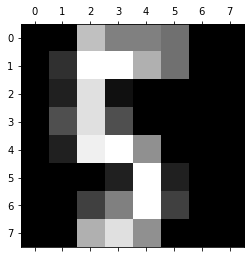

In [4]:
dig = load_digits()
plt.gray()
plt.matshow(dig.images[25])

In [5]:
onehot_target = pd.get_dummies(dig.target)